# Circular Data Generator

In [34]:
import numpy as np
import pandas as pd
import math
import plotly.express as px
import matplotlib.pyplot as plt

In [46]:
def circle(r, n, noise=20, seed=42):
    np.random.seed(seed)
    points = []
    for x in range(1, n+1):
        point = (math.cos(2 * math.pi/n*x) * r + np.random.normal(-noise, noise),
                 math.sin(2 * math.pi/n*x) * r + np.random.normal(-noise, noise) )
        points.append(point)
    return points

def list_to_df(ls, i):
    df = pd.DataFrame(ls)
    df['cluster'] = str(i + 1)
    return df
    
small_circle = circle(100, 300, 10)
medium_circle = circle(300, 700, 20)
big_circle = circle(500, 1000, 30)

noise = [(np.random.randint(-600, 600),
         np.random.randint(-600, 600)) for i in range(300)]

data = [list_to_df(ls, i) for i, ls in enumerate([small_circle, medium_circle, big_circle, noise])]
data = pd.concat(data)
data.columns = ['x', 'y', 'cluster']



In [47]:
data.sample(10)

,x,y,cluster
316,-310.095288,59.030816,2
872,291.262115,-380.817172,3
2,462.886575,-27.599889,3
369,-322.309320,364.915416,3
248,-57.975813,464.279970,3
731,-92.698890,-552.321269,3
414,-472.976618,216.067170,3
363,-317.265732,-50.648336,2
340,-278.910464,356.600738,3
222,-27.232260,-103.215558,1


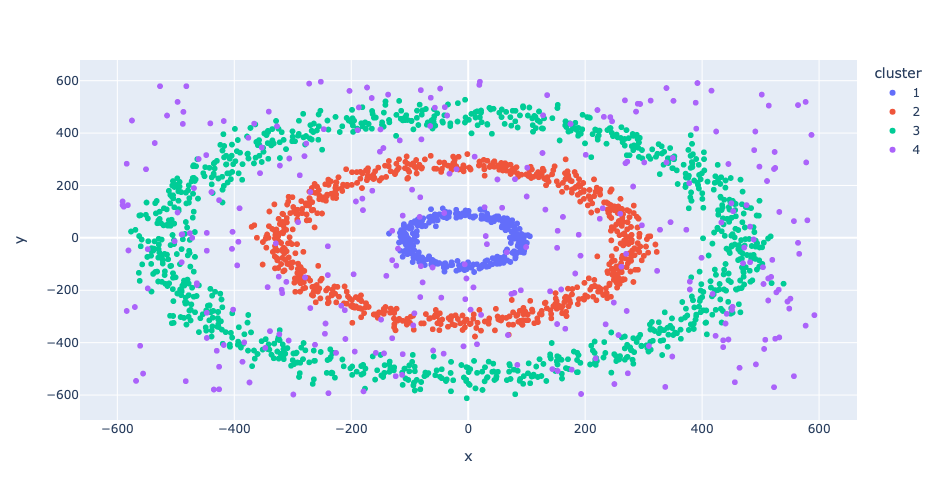

In [48]:
fig = px.scatter(data,
                    x="x",
                    y="y",
                    color="cluster",
                    height=500)
fig.show()

In [50]:
data.to_csv("circular_data.csv", index=False)